In [17]:
from cv2 import *
import numpy as np
import matplotlib.pyplot as plt

TypeError: Image data of dtype <U8 cannot be converted to float

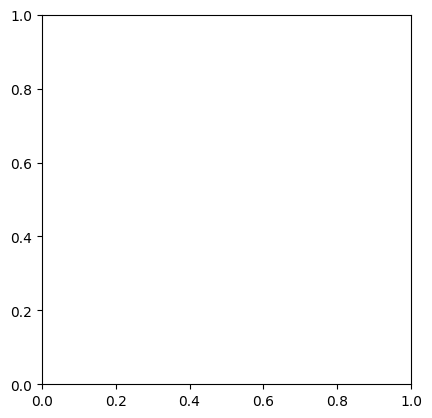

In [19]:
cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
ret,frame = cap.read() # return a single frame in variable `frame`
img = "test.png"


while(True):
    cv2.imshow('img1',frame) #display the captured image
    if cv2.waitKey(1) & 0xFF == ord('y'): #save on pressing 'y' 
        cv2.imwrite(img,frame)
        cv2.destroyAllWindows()
        break

cap.release()
plt.imshow(img)



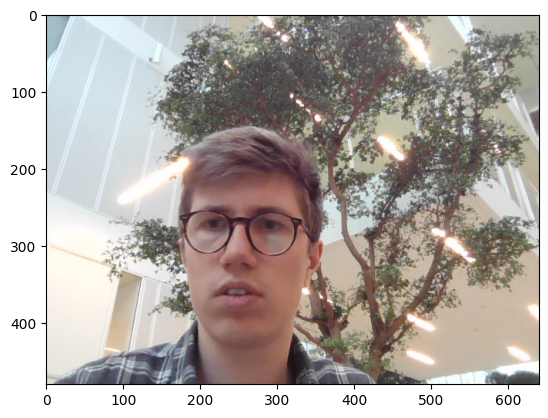

In [24]:
img = cv2.imread('test.png')
img = img[:,:,::-1]
plt.imshow(img)

(240,)


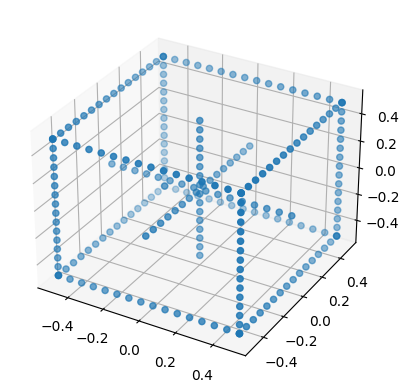

In [36]:
import itertools as it
def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2
box = np.array(box3d())

x = box[0,:]
y = box[1,:]
z = box[2,:]
print(np.shape(x))
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(x,y,z,marker = 'o')
plt.show()



In [60]:
def Pi(ph):
    p = ph[:-1]/ph[-1]
    return p

def PiInv(p):
    H = np.shape(p)[1]
    homo = np.ones((1, H))
    ph = np.concatenate((p,homo),axis = 0)
    return ph

print(np.shape(PiInv(np.array(box3d()))))


(4, 240)


In [85]:
def projectpoints(K,R,t,Q):
    
    t = np.transpose([t])
    H = np.concatenate((R,t),axis=1)
    Q = PiInv(Q)

    return K@H@Q


Q = np.array(box3d())
K = np.diag([1,1,1])
t = np.array([0, 0, 4])
theta = 0
R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta),0,np.cos(theta)]])
print(R)
projectpoints(K,R,t,Q)


[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


array([[-0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
        -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
         0.16666667,  0.23333333,  0.3       ,  0.36666667,  0.43333333,
         0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       ,  0.5       ,
         0.5       ,  0.5       ,  0.5       ,  0.5

[[ 0.69670671  0.          0.71735609]
 [ 0.          1.          0.        ]
 [-0.71735609  0.          0.69670671]]
(240,)


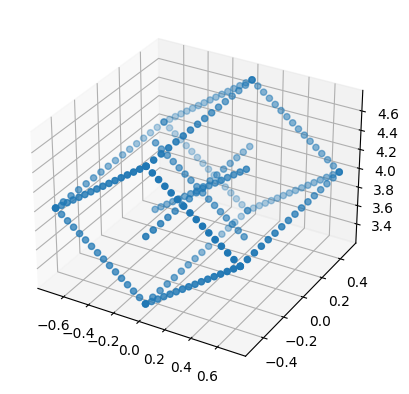

In [87]:
Q = np.array(box3d())
K = np.diag([1,1,1])
t = np.array([0, 0, 4])
theta = 0.8
R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta),0,np.cos(theta)]])
print(R)


box = np.array(projectpoints(K,R,t,Q))

x = box[0,:]
y = box[1,:]
z = box[2,:]
print(np.shape(x))
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(x,y,z,marker = 'o')
plt.show()